In [24]:
import torch
torch.cuda.set_device(4)
import torch.nn as nn
import torch.nn.functional as f
from torch.optim import *
#datasets & transformation
import torchvision as tv
import torchvision.transforms as transforms

In [25]:
## load dataset & dataloader
train = tv.datasets.MNIST(root='./data/', train = True, transform = transforms.ToTensor(), download = True)
test = tv.datasets.MNIST(root='./data',train=False, transform = transforms.ToTensor(), download = True)

train_loader = torch.utils.data.DataLoader(train,100,True)
test_loader = torch.utils.data.DataLoader(train,100,False)

In [26]:
## create class for classifier with forward pass
class CNN(nn.Module):
    def __init__(self,):
        super(CNN, self).__init__()
        
        #defining layers
        #conv layer
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size = 5)
        
        #maxpooling
        self.maxpool1 = nn.MaxPool2d(kernel_size =2, stride = 2)
        self.maxpool2 = nn.MaxPool2d(kernel_size =2, stride = 2)
        
        #Fully connected layer
        self.fc1 = nn.Linear(12*4*4,100)
        self.fc2 = nn.Linear(100,10)
        
    def forward(self, x):
        x = self.maxpool1(f.relu(self.conv1(x)))
        x = self.maxpool2(f.relu(self.conv2(x)))
        
        x = f.relu(self.fc1(x.reshape(-1,12*4*4)))
        x = self.fc2(x)
        
        return x   

In [40]:
## model object
model = CNN()
model.cuda()
print(model)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=192, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [28]:
loss_001 =[]
acc_001 = []
loss_005 =[]
acc_005 = []
loss_01 =[]
acc_01 = []

loss_SGD=[]
acc_SGD=[]
loss_Adam=[]
acc_Adam=[]

loss_relu=[]
acc_relu=[]
loss_tanh=[]
acc_tanh=[]

accuracy_test_lr = []
accuracy_test_opt = []
accuracy_test_act=[]

In [41]:
## loss & optimizer
loss_type = nn.CrossEntropyLoss()
loss_type.cuda()
optimizer = SGD(model.parameters(),lr=0.01) #0.005, 0.01

In [42]:
##training
import numpy as np
epoch = 20
steps = len(train_loader)

for i in range(epoch):
    total=0
    correct=0
    total_loss=0
    for j,(image,label) in enumerate(train_loader):
        image = image.cuda()
        label = label.cuda()
        output = model(image)
        loss = loss_type(output,label)
       
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _,pred = torch.max(output.data,1)
        total += label.size(0)
        correct += (pred==label).sum().item()
        l=loss.item()
        total_loss += l
        
    print('Epoch:{}/{}, Training Loss:{:.2f}, Training Accuracy:{:.2f}'.format(i+1,epoch,total_loss/len(train_loader),100 * correct / total))
        
    loss_01.append(total_loss/len(train_loader))
    acc_01.append(100 * correct / total)  


Epoch:1/20, Training Loss:2.02, Training Accuracy:34.58
Epoch:2/20, Training Loss:0.47, Training Accuracy:86.17
Epoch:3/20, Training Loss:0.30, Training Accuracy:91.13
Epoch:4/20, Training Loss:0.22, Training Accuracy:93.45
Epoch:5/20, Training Loss:0.18, Training Accuracy:94.77
Epoch:6/20, Training Loss:0.15, Training Accuracy:95.62
Epoch:7/20, Training Loss:0.13, Training Accuracy:96.14
Epoch:8/20, Training Loss:0.12, Training Accuracy:96.50
Epoch:9/20, Training Loss:0.11, Training Accuracy:96.81
Epoch:10/20, Training Loss:0.10, Training Accuracy:97.06
Epoch:11/20, Training Loss:0.09, Training Accuracy:97.20
Epoch:12/20, Training Loss:0.08, Training Accuracy:97.42
Epoch:13/20, Training Loss:0.08, Training Accuracy:97.52
Epoch:14/20, Training Loss:0.07, Training Accuracy:97.73
Epoch:15/20, Training Loss:0.07, Training Accuracy:97.79
Epoch:16/20, Training Loss:0.07, Training Accuracy:97.95
Epoch:17/20, Training Loss:0.06, Training Accuracy:97.98
Epoch:18/20, Training Loss:0.06, Trainin

In [43]:
#testing

model.eval()
with torch.no_grad():
    total=0
    correct=0
    
    for j,(im_test,label_test) in enumerate(test_loader):
            im_test=im_test.cuda()
            label_test=label_test.cuda()
            output_test = model(im_test)
            loss_test = loss_type(output_test,label_test)


            _,pred = torch.max(output_test.data,1)
            total += label_test.size(0)
            correct += (pred==label_test).sum().item()
            acc_test = 100 * correct / total
            
            #print(correct)
    accuracy_test_lr.append(acc_test)
    #accuracy_test_opt.append(acc_test)
    #accuracy_test_act.append(acc_test)
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(acc_test))
        



Test Accuracy of the model on the 10000 test images: 98.39 %


In [44]:
#accuracy_test_opt
accuracy_test_lr
#accuracy_test_act

[90.97666666666667, 97.00833333333334, 98.39]

In [45]:
print(loss_001[19], acc_001[19])
print(loss_005[19], acc_005[19])
print(loss_01[19], acc_01[19])
#print(loss_SGD[19], acc_SGD[19])
#print(loss_Adam[19], acc_Adam[19])
#print(loss_relu[19], acc_relu[19])
#print(loss_tanh[19], acc_tanh[19])

0.31069939250747364 90.73166666666667
0.1008107973728329 96.86666666666666
0.057737590071822824 98.21833333333333


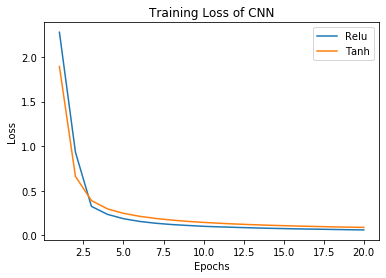

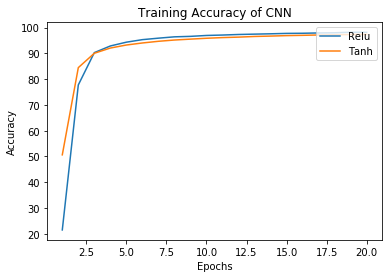

In [23]:
#Actvation compare

import matplotlib.pyplot as plt

figure1,bx = plt.subplots()

bx.plot([None]+loss_relu, label='Relu')
bx.plot([None]+loss_tanh, label='Tanh')
bx.set_title('Training Loss of CNN')
bx.set_xlabel('Epochs')
bx.set_ylabel('Loss')
bx.legend(loc="upper right")

figure,cx = plt.subplots()

cx.plot([None]+acc_relu,label='Relu')
cx.plot([None]+acc_tanh,label='Tanh')
cx.set_title('Training Accuracy of CNN')
cx.set_xlabel('Epochs')
cx.set_ylabel('Accuracy')
cx.legend(loc="upper right")



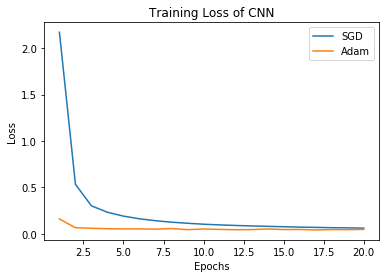

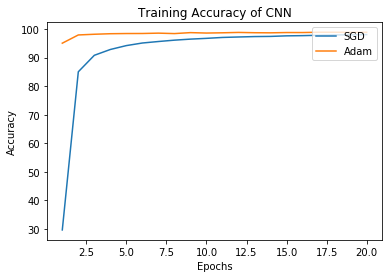

In [41]:
#Optimizer compare

import matplotlib.pyplot as plt

figure1,bx = plt.subplots()

bx.plot([None]+loss_SGD, label='SGD')
bx.plot([None]+loss_Adam, label='Adam')
bx.set_title('Training Loss of CNN')
bx.set_xlabel('Epochs')
bx.set_ylabel('Loss')
bx.legend(loc="upper right")

figure,cx = plt.subplots()

cx.plot([None]+acc_SGD,label='SGD')
cx.plot([None]+acc_Adam,label='Adam')
cx.set_title('Training Accuracy of CNN')
cx.set_xlabel('Epochs')
cx.set_ylabel('Accuracy')
cx.legend(loc="upper right")



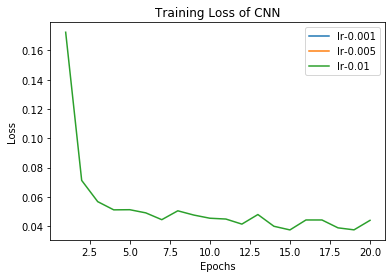

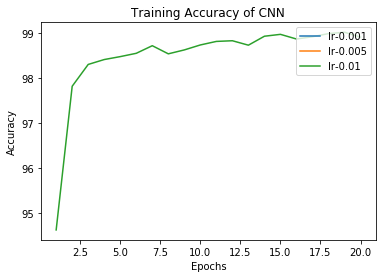

In [38]:
#Learning rate compare

import matplotlib.pyplot as plt

figure1,bx = plt.subplots()
bx.plot([None]+loss_001, label='lr-0.001')
bx.plot([None]+loss_005, label='lr-0.005')
bx.plot([None]+loss_01, label='lr-0.01')

bx.set_title('Training Loss of CNN')
bx.set_xlabel('Epochs')
bx.set_ylabel('Loss')
bx.legend(loc="upper right")

figure,cx = plt.subplots()
cx.plot([None]+acc_001,label='lr-0.001')
cx.plot([None]+acc_005,label='lr-0.005')
cx.plot([None]+acc_01,label='lr-0.01')
cx.set_title('Training Accuracy of CNN')
cx.set_xlabel('Epochs')
cx.set_ylabel('Accuracy')
cx.legend(loc="upper right")



In [39]:
#print(loss_001[49], acc_001[49])
#print(loss_005[49], acc_005[49])
print(loss_01[19], acc_01[19])

0.0439929331460462 98.90666666666667
